# 0.0 General Imports 

In [80]:
import numpy as np
import pandas as pd
import mglearn #pip3 install mglearn
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# 1.0 Iris Dataset (a.k.a ML 101 Example)

## 1.1 Really Brief Intro (yes, in plain text)

## 1.2 The example

### 1.2.1 Specific Imports

In [9]:
from sklearn.datasets import load_iris

### 1.2.3 Loading the dataset

In [10]:
iris_dataset = load_iris()

### 1.2.4 Describe the data

In [71]:
X = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names']) # 4 features
y = iris_dataset['target'] # classes

### 1.2.5 Basic Info

In [72]:
print("The dataset has {} rows ans {} columns.".format(*X.shape))

The dataset has 150 rows ans 4 columns.


In [73]:
print("We have {} features which are {}, respectively.".format(len(iris_dataset['feature_names']), ', '.join(iris_dataset['feature_names'])))

We have 4 features which are sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), respectively.


In [74]:
print("We have {} classes which are {}, respectively.".format(len(iris_dataset['target_names']), ', '.join(iris_dataset['target_names'])))

We have 3 classes which are setosa, versicolor, virginica, respectively.


In [75]:
print("The \"target\" column contains the classes values encoded as {}, respectively.".format(', '.join([str(x) for x in np.unique(y)])))

The "target" column contains the classes values encoded as 0, 1, 2, respectively.


In [76]:
X.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

All features are float64.

In [77]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

There is no null values in the Iris dataset.

### 1.2.6 Basic Statistics

In [78]:
stats = X.describe()

In [65]:
# Adding some more stats
stats.loc['variance'] = df.var().tolist()
stats.loc['skewess'] = df.skew().tolist()
stats.loc['kurtosis'] = df.kurtosis().tolist()

In [66]:
stats

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
variance,0.685694,0.189979,3.116278,0.581006
skewess,0.314911,0.318966,-0.274884,-0.102967


** Some comments **

* Count: There are 150 examples in this dataset :)
* Mean: sepal length has the highest mean, while petal with has the lowest mean. The mean itself can be missleading as it is sensible to outliers. Therefore, I find it important to look at median and standard deviation, as well.
* Median (a.k.a 50% percentile): The median follows the mean pattern for each feature (max to min order). The highest absolute difference is in petal length, followed by petal width. When median is greater than mean, the feature distribution is left skewed. We can observe that sepal length and sepal width are pretty much normally distributted.
* Std: We can find the highest standard deviation in petal length. This indicates, the data in this feature are more spread. To confirm this, we can look at the min and max values of this feature. And, indeed, it has the highest range.
* Skewness: Indicates a positive skewed distribution for sepal length and sepal width (cm) and a negative skewed distribution for petal length and petal width.
* Kurtosis: sepal width has a high degree of peakedness, while sepal length, petal length and petal width are flatter.

### 1.2.7 Visualize the data

In [113]:
df_view = pd.DataFrame(np.append(iris_dataset['data'], y.reshape(-1,1), axis=1), columns=iris_dataset['feature_names'] + ['class'])

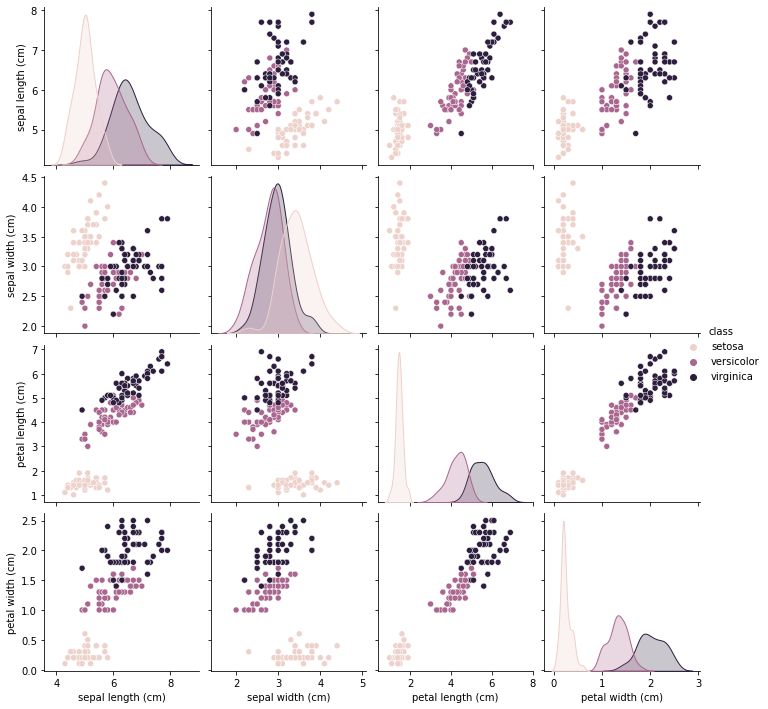

In [115]:
g = sns.pairplot(df_view, hue='class');

# replace labels
for t, l in zip(g._legend.texts, iris_dataset['target_names']): t.set_text(l)

From the graph above, we can observe that Iris setosa has features which are very distinct to the other types of Iris.
Thus, it is easy to derive a function (or a set of rules) to separate setosa from others. But the same is not true for versicolor and virginica, in which, at times, share some features. Possibly, petal length and petal width are the most powerful features for predicting the classes.

### 1.2.8 The first model

#### 1.2.8.1 Specific Imports

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#### 1.2.8.2 Preparing the data (train & test datasets)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

#### 1.2.8.3 Build the model

In [170]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### 1.2.8.4 Evaluating the model

In [171]:
print("Train set score: {:.2f}".format(np.mean(knn.predict(X_train) == y_train)))
print("Test set score: {:.2f}".format(np.mean(knn.predict(X_test) == y_test)))

Train set score: 1.00
Test set score: 0.97


#### 1.2.8.5 Making predictions

In [172]:
new_flower = np.array([[5, 2.9, 1, 0.2]])


prediction = knn.predict(new_flower)
print("The features {} are from a Iris {}.".format(', '.join([str(x) for x in new_flower.ravel()]), *iris_dataset['target_names'][prediction]))

The features 5.0, 2.9, 1.0, 0.2 are from a Iris setosa.


# 2.0 Conclusion

Although very simple, the iris dataset is a classic 101 example for ML novices. In this toy dataset, I passed through some techniques of data analysis, visualization and also explored the sklearn framework for machine learning.